<a href="https://colab.research.google.com/github/1rn19cs176varunalingam/NASTECH-HACKATHON/blob/main/heart_detectiON(HACKATHON).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [585]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [586]:
#reading the .data file
df=  pd.read_csv('/content/drive/MyDrive/hackathon ai ml/cleveland.csv')

In [632]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [590]:
#so i am renaming my columns since it was a .data file
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [591]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [592]:
df.isnull().sum()
#to see if there are any null vaules in our dataset and there are a few in ca and thal

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [593]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [594]:
df['ca']

0      3.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
297    0.0
298    2.0
299    1.0
300    1.0
301    NaN
Name: ca, Length: 302, dtype: float64

## ANALYSIS OF DATA

In [595]:
#so we are doing this for various types of analysis so that we can understand
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
#here we have filled the na values with the mean of that coulumn
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

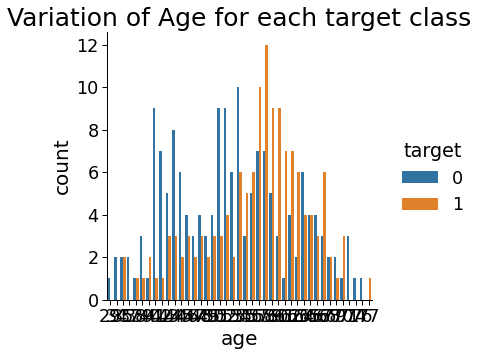

In [596]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

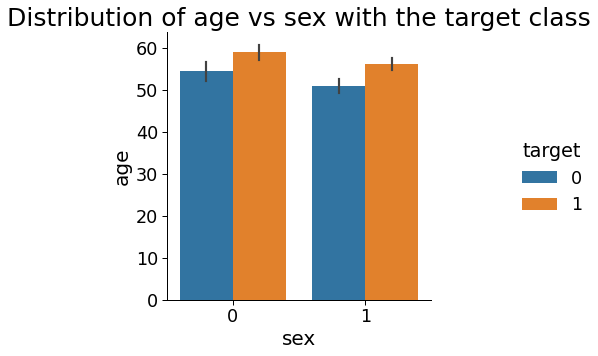

In [597]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()



In [598]:
#lemme know explain what each of the column does.
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


0    163
1    139
Name: target, dtype: int64


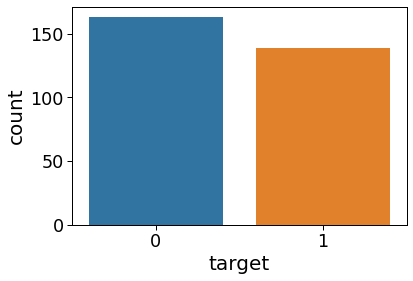

In [599]:
#lets understnad the coulmns target
y = df["target"]
sns.countplot(y)
target_temp = df.target.value_counts()
print(target_temp)

In [600]:
#now from the above bar graph lets observe the percentage of people with heart disease and without heart disease

print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/301,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/301,2)))

Percentage of patience without heart problems: 54.15
Percentage of patience with heart problems: 46.18


In [601]:
#chest pain analysis as observed from the data
df["cp"].unique()

array([4, 3, 2, 1])

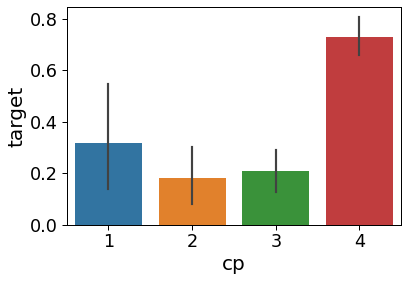

In [602]:
sns.barplot(df["cp"],y)

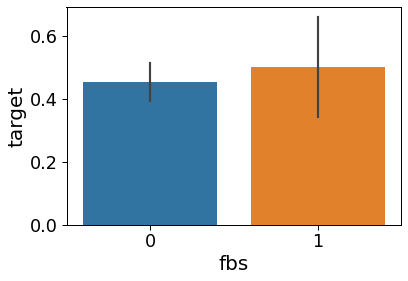

In [603]:
#lets do analysis of fbs(fasting blood sugar)(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
sns.barplot(df["fbs"],y)

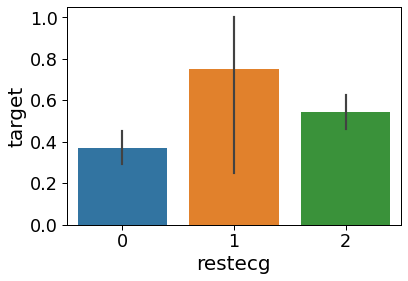

In [604]:
#analysis of restecg resting electrocardiographic results
sns.barplot(df["restecg"],y)

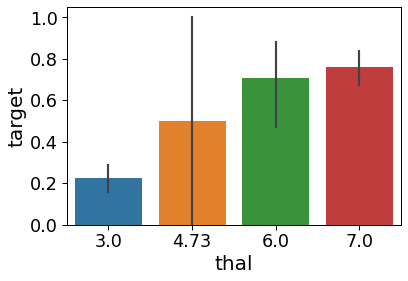

In [605]:
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
sns.barplot(df["thal"],y)

# PROCESSING OF DATA

In [606]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling

import xgboost as xgb
import itertools
from sklearn.dummy import DummyClassifier
from sklearn import metrics

In [607]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [608]:
#lets check our baseline accuracy by using dummies
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)
#so only 54 percent accracy

0.5081967213114754

# 1.logistic regression

In [609]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
lr_acc_score=metrics.accuracy_score(y_test, y_pred_log)
lr_f1_score=metrics.f1_score(y_test, y_pred_log)
lr_conf_matrix = confusion_matrix(y_test, y_pred_log)
# checking accuracy
print('Test Accuracy score: ', lr_acc_score)
print('Test F1 score: ', lr_f1_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_log))

Test Accuracy score:  0.8852459016393442
Test F1 score:  0.8813559322033899
confusion matrix
[[28  5]
 [ 2 26]]


              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



f1 score fo regressioin anlysis

In [610]:
print('F1 score for logistic regression ', lr_f1_score)

F1 score for logistic regression  0.8813559322033899


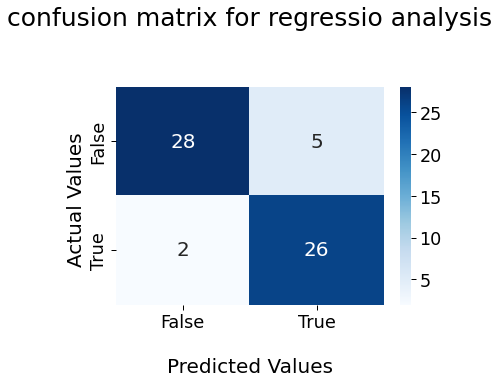

In [611]:
#tp print the above confusion matrix as a heatmap
import seaborn as sns

ax = sns.heatmap(lr_conf_matrix, annot=True, cmap='Blues')

ax.set_title('confusion matrix for regressio analysis\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

# 2.KNN model

In [612]:
#knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_knn = knn.predict(X_test)
knn_acc_score=metrics.accuracy_score(y_test, y_pred_knn)
knn_f1_score=metrics.f1_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score)
print('Test F1 score: ',knn_f1_score )
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_knn))

Test Accuracy score:  0.8032786885245902
Test F1 score:  0.793103448275862
confusion matrix
[[26  7]
 [ 5 23]]


              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.77      0.82      0.79        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [613]:
#f1 score for knn model
print('F1 score for logistic regression ', knn_f1_score)

F1 score for logistic regression  0.793103448275862


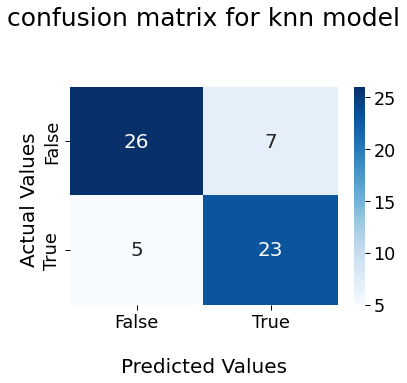

In [614]:
#tp print the above confusion matrix as a heatmap
import seaborn as sns

ax = sns.heatmap(knn_conf_matrix, annot=True, cmap='Blues')

ax.set_title('confusion matrix for knn model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

# 3.DECISON TREE

In [615]:
#DECISION TREE MODEL
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_acc_score=metrics.accuracy_score(y_test, y_pred_tree)
tree_f1_score=metrics.f1_score(y_test, y_pred_tree)
tree_conf_matrix=confusion_matrix(y_test,y_pred_tree)
# checking accuracy
print('Test Accuracy score: ', tree_acc_score)
print('Test F1 score: ', tree_f1_score)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_tree))


Test Accuracy score:  0.7377049180327869
Test F1 score:  0.7241379310344827
confusion matrix
[[24  9]
 [ 7 21]]


              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.70      0.75      0.72        28

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [616]:
#f1 score for decsion tree model
print('F1 score for logistic regression ', tree_f1_score)

F1 score for logistic regression  0.7241379310344827


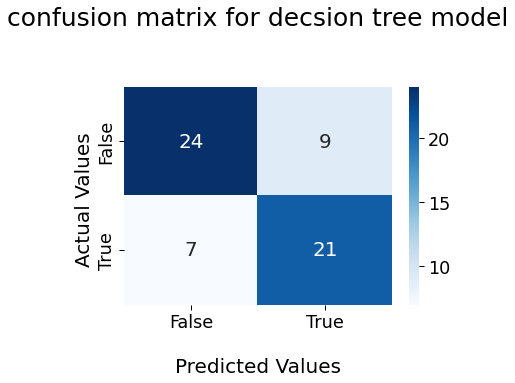

In [617]:
#tp print the above confusion matrix as a heatmap
import seaborn as sns

ax = sns.heatmap(tree_conf_matrix, annot=True, cmap='Blues')

ax.set_title('confusion matrix for decsion tree model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

# 4 Naive Bayes

In [618]:
#applying the naive bayes algorithm
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score=metrics.f1_score(y_test, y_pred_nb)
print('Test Accuracy score: ',nb_acc_score)
print('Test F1 score: ', nb_f1_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_nb))

Test Accuracy score:  0.8524590163934426
Test F1 score:  0.8421052631578947
confusion matrix
[[28  5]
 [ 4 24]]


              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.83      0.86      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [619]:
#f1 score for naive bayes model
print('F1 score for logistic regression ', nb_f1_score)

F1 score for logistic regression  0.8421052631578947


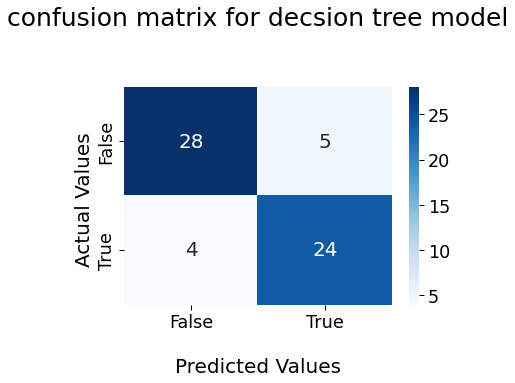

In [620]:
#tp print the above confusion matrix as a heatmap
import seaborn as sns

ax = sns.heatmap(nb_conf_matrix, annot=True, cmap='Blues')

ax.set_title('confusion matrix for decsion tree model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

# 5 SUPPORT VECTOR CLASSIFIER

In [621]:
#ALGORTIM FOR SVC
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
svc_f1_score = metrics.f1_score(y_test, y_pred_svc)
print('Test Accuracy score: ',svc_acc_score)
print('Test F1 score: ', svc_f1_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')
print(classification_report(y_test,y_pred_svc))

Test Accuracy score:  0.8360655737704918
Test F1 score:  0.8333333333333334
confusion matrix
[[26  7]
 [ 3 25]]


Accuracy of Support Vector Classifier: 0.8360655737704918 

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [622]:
#f1 score for naive bayes model
print('F1 score for logistic regression ', svc_f1_score)

F1 score for logistic regression  0.8333333333333334


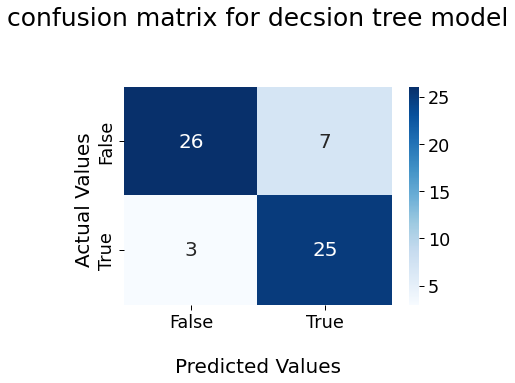

In [623]:
#tp print the above confusion matrix as a heatmap
import seaborn as sns

ax = sns.heatmap(svc_conf_matrix, annot=True, cmap='Blues')

ax.set_title('confusion matrix for decsion tree model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

# comaparison of all the f1 score of all models:

In [624]:
# so here we know that logistic has teh highest accracy
model_ev = pd.DataFrame({'Model': ['Logistic Regression',
                    'K-Nearest Neighbour','Decision Tree','Naive Bayes','Support Vector Classifier'], 'f1 score': [lr_f1_score,knn_f1_score,tree_f1_score,nb_f1_score,svc_f1_score]})
model_ev

,Model,f1 score
0,Logistic Regression,0.881356
1,K-Nearest Neighbour,0.793103
2,Decision Tree,0.724138
3,Naive Bayes,0.842105
4,Support Vector Classifier,0.833333


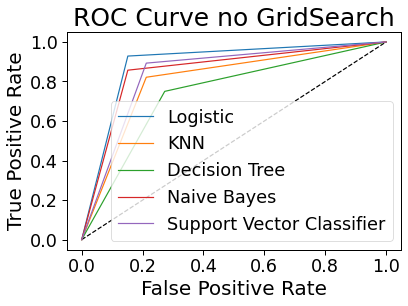

In [625]:
# Plot ROC curve
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)
fpr_nb, tpr_nb, thresholds_log = roc_curve(y_test, y_pred_nb)
fpr_svc, tpr_svc, thresholds_log = roc_curve(y_test, y_pred_svc)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log,label = 'Logistic')
plt.plot(fpr_knn, tpr_knn,label = 'KNN')
plt.plot(fpr_tree, tpr_tree,label = 'Decision Tree')
plt.plot(fpr_nb,tpr_nb,label= 'Naive Bayes')
plt.plot(fpr_svc,tpr_svc,label= 'Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve no GridSearch')
plt.show()

SO FROM THE GRAPH WE CAN SAY THAT LOGISTIC REGRESSOR WORKS AS THE BEST MODEL